<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session4/Assignment4C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

MaxPooling,Dropout 1*1,Batch Normalization

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


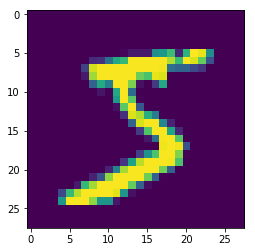

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(8,(3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Conv2D(16,(3, 3), activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Conv2D(32,(3, 3), activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Conv2D(8,(1, 1), activation='relu'))#11   

model.add(Conv2D(16,(3,3), activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Conv2D(32, (3, 3), activation='relu')) #7
#model.add(BatchNormalization())
#model.add(Dropout(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))#4
model.add(Conv2D(8,(1, 1), activation='relu'))#5


model.add(Conv2D(10,(3,3)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1,validation_split=0.1)
#model.fit(X_train, Y_train,batch_size=128,nb_epoch=50,verbose=1,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s 153us/step - loss: 0.4316 - acc: 0.8648 - val_loss: 0.1066 - val_acc: 0.9695
Epoch 2/20
54000/54000 [==============================] - 5s 99us/step - loss: 0.1126 - acc: 0.9650 - val_loss: 0.0713 - val_acc: 0.9795
Epoch 3/20
54000/54000 [==============================] - 5s 100us/step - loss: 0.0806 - acc: 0.9750 - val_loss: 0.0587 - val_acc: 0.9817
Epoch 4/20
54000/54000 [==============================] - 5s 99us/step - loss: 0.0650 - acc: 0.9795 - val_loss: 0.0468 - val_acc: 0.9862
Epoch 5/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.0557 - acc: 0.9831 - val_loss: 0.0487 - val_acc: 0.9862
Epoch 6/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0434 - val_acc: 0.9872
Epoch 7/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.0457 - acc: 0.9853 - val_loss: 0.0354 - val_ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 69us/step


In [0]:
print(score)

[0.027972464834776473, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.71270113e-07 2.81996847e-07 1.32512068e-05 5.41492273e-06
  8.34605984e-09 2.22812730e-07 4.43395581e-12 9.99632359e-01
  1.78845733e-06 3.46214307e-04]
 [8.42581755e-07 4.60234378e-06 9.99971747e-01 5.82390885e-06
  4.69524464e-09 3.27377947e-09 3.28946362e-06 8.85603811e-07
  1.27728208e-05 2.45515518e-11]
 [7.36462243e-06 9.99350846e-01 1.62707816e-04 2.92302005e-08
  1.00406607e-04 3.15345414e-06 2.68447293e-05 3.04835150e-04
  4.30090113e-05 7.86317401e-07]
 [9.98795629e-01 1.51251256e-09 1.71205772e-06 9.75418715e-08
  5.17721446e-06 7.53473515e-08 1.09980523e-03 8.91033736e-08
  7.16547038e-06 9.02655011e-05]
 [2.23365961e-11 1.71134995e-10 4.28208979e-09 9.12664180e-11
  9.99934077e-01 6.91941365e-11 3.70684899e-10 3.40867473e-10
  1.62734590e-08 6.58922218e-05]
 [1.25684221e-06 9.99345243e-01 1.30764238e-04 6.37073905e-09
  1.45293103e-04 2.63216634e-07 1.55833618e-06 3.60259815e-04
  1.49216785e-05 3.23724350e-07]
 [3.56137841e-10 3.29113377e-08 6.31078024e-07 4.02669759e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

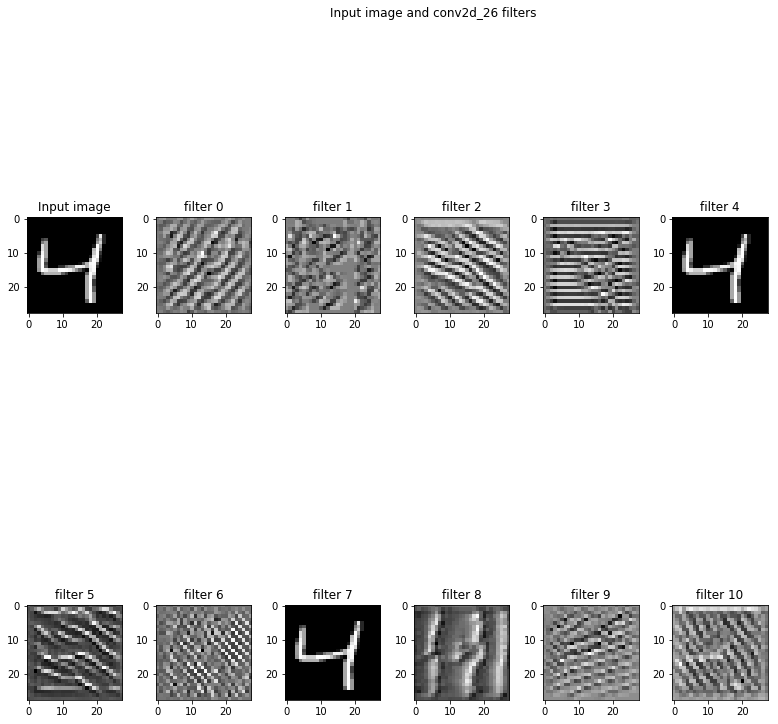

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_26'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()